<!--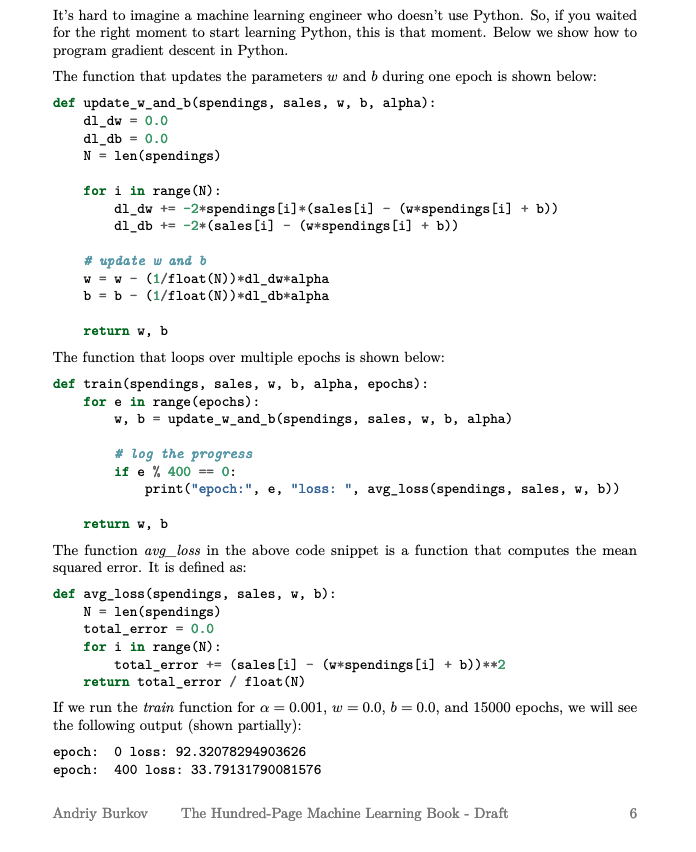# Gradient Descent Methods-->

[Ossenbruggen (1985-ish)](http://54.243.252.9/ce-5333-systems-webroot/3-Readings/OptimizeOssenbruggen/OptimizeOssenbruggen.pdf)

## Steepest Descent

[Singer, Y (2016) "Gradient Descent Methods" lecture notes from AM 221: Advanced Optimization](https://people.seas.harvard.edu/~yaron/AM221-S16/lecture_notes/AM221_lecture9.pdf)

The following are from [Burkov, A (2019) *excerpts from* The Hundred-Page Machine Learning Book - Draft](http://ema.cri-info.cm/wp-content/uploads/2019/07/2019BurkovTheHundred-pageMachineLearning.pdf)

![](downhill-001.png)

![](downhill-002.png)

![](downhill-003.png)

![](downhill-004.png)

![](downhill-006.png)

![](downhill-007.png)


## Using Packages

## Unconstrained Minimization

Example problem is 

$$f(x) = \sum_{i = 1}^{N-1} \:100(x_i - x_{i-1}^{2})$$

### Nelder-Mead Method

- Function calls only
- Needs a starting vector that is non-degenerate

In [1]:
import numpy as np
from scipy.optimize import minimize



def rosen(x):
    """The Rosenbrock function"""
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])
res = minimize(rosen, x0, method='nelder-mead',options={'disp': True})

print(res.x)

Optimization terminated successfully.
         Current function value: 0.000066
         Iterations: 141
         Function evaluations: 243
[0.99910115 0.99820923 0.99646346 0.99297555 0.98600385]


### Powell's Direction Set Method

- Function calls only
- Needs a starting vector that is non-degenerate

In [2]:
import numpy as np
from scipy.optimize import minimize



def rosen(x):
    """The Rosenbrock function"""
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])
res = minimize(rosen, x0, method='powell',options={'disp': True})

print(res.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 18
         Function evaluations: 1084
[1. 1. 1. 1. 1.]


In [3]:
def rosen(x):
    nminus1 = len(x)-1
    acc = 0.0
    for i in range(nminus1):
        acc = acc + 100*(x[i+1]-x[i]**2)
    return acc

In [5]:
import numpy as np
from scipy.optimize import minimize


#Rosenbrock Function
def fun_rosenbrock(x):
    return np.array([10 * (x[1] - x[0]**2), (1 - x[0])])
   
from scipy.optimize import least_squares
input = np.array([2, 2])
res = least_squares(fun_rosenbrock, input)

print(res)

 active_mask: array([0., 0.])
        cost: 2.2211364862629114e-29
         fun: array([-6.66133815e-15, -2.22044605e-16])
        grad: array([ 1.33448809e-13, -6.66133815e-14])
         jac: array([[-20.00000015,  10.        ],
       [ -1.        ,   0.        ]])
     message: '`gtol` termination condition is satisfied.'
        nfev: 3
        njev: 3
  optimality: 1.3344880855256055e-13
      status: 1
     success: True
           x: array([1., 1.])


In [28]:
def rosen_der(x):

    xm = x[1:-1]

    xm_m1 = x[:-2]

    xm_p1 = x[2:]

    der = np.zeros_like(x)

    der[1:-1] = 200*(xm-xm_m1**2) - 400*(xm_p1 - xm**2)*xm - 2*(1-xm)

    der[0] = -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0])

    der[-1] = 200*(x[-1]-x[-2]**2)

    return der

from scipy.optimize import Bounds

bounds = Bounds([0, -0.5], [1.0, 2.0])

ineq_cons = {'type': 'ineq',

             'fun' : lambda x: np.array([1 - x[0] - 2*x[1],

                                         1 - x[0]**2 - x[1],

                                         1 - x[0]**2 + x[1]]),

#             'jac' : lambda x: np.array([[-1.0, -2.0],

#                                         [-2*x[0], -1.0],

#                                         [-2*x[0], 1.0]])
            }

eq_cons = {'type': 'eq',

           'fun' : lambda x: np.array([2*x[0] + x[1] - 1]),

#           'jac' : lambda x: np.array([2.0, 1.0])
          }

x0 = np.array([0.5, 0])

res = minimize(rosen, x0, method='SLSQP', jac="2-point",

               constraints=[eq_cons, ineq_cons], options={'ftol': 1e-9, 'disp': True},

               bounds=bounds)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.342717574995039
            Iterations: 4
            Function evaluations: 13
            Gradient evaluations: 4


In [26]:
res

     fun: 0.342717574995039
     jac: array([-0.82675983, -0.41372783])
 message: 'Optimization terminated successfully'
    nfev: 13
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([0.41494475, 0.1701105 ])